In [1]:
!pip install  kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d shreyanshgupta/covid19-xray-dataset-with-preprocessed-images
!unzip covid19-xray-dataset-with-preprocessed-images.zip



covid19-xray-dataset-with-preprocessed-images.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-xray-dataset-with-preprocessed-images.zip
replace CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
import pandas as pd
from tensorflow import keras
from keras.models import *
import tensorflow as tf
from keras.layers import *
import tensorflow.keras.utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
from numpy import argmax


In [3]:
train_data=ImageDataGenerator(rescale=1./255.)
test_data=ImageDataGenerator(rescale=1./255.)

train_dataset = train_data.flow_from_directory('/content/CovidDataset/Train',
                                                target_size=(200,200),
                                                batch_size= 128,
                                                class_mode='categorical',shuffle=False)

test_dataset = test_data.flow_from_directory('/content/CovidDataset/Val',
                                           target_size = (200,200),
                                           batch_size = 128,
                                           class_mode ='categorical',shuffle=False)

Found 870 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [4]:
test_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [5]:
test_dataset.filenames

['Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png',
 'Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png',
 'Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png',
 'Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png',
 'Covid/16654_4_1.jpg',
 'Covid/16660_1_1.jpg',
 'Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg',
 'Covid/AR-2.jpg',
 'Covid/COVID-19 (103).png',
 'Covid/COVID-19 (104).png',
 'Covid/COVID-19 (105).png',
 'Covid/COVID-19 (109).png',
 'Covid/COVID-19 (111).png',
 'Covid/COVID-19 (116).png',
 'Covid/COVID-19 (12).png',
 'Covid/COVID-19 (120).png',
 'Covid/COVID-19 (121).png',
 'Covid/COVID-19 (127).png',
 'Covid/COVID-19 (129).png',
 'Covid/COVID-19 (13).png',
 'Covid/COVID-19 (18).png',
 'Covid/COVID-19 (33).png',
 'Covid/COVID-19 (38).png',
 'Covid/COVID-19 (39).png',
 'Covid/COVID-19 (58).png',
 'Covid/COVID-19 (63).png',
 'Covid/COVID-19 (68).png',
 'Covid/COVID-19 (69).png',
 'Covid/COVID-19 (7).png',
 'Covid/COVID-19 (72).png',
 '

In [6]:
import os
os.listdir('/content/Covid19-dataset/test')

['Normal', 'Covid', 'Viral Pneumonia']

In [7]:
(train_dataset.class_indices,test_dataset.class_indices)


({'Covid': 0, 'Normal': 1, 'Pneumonia': 2},
 {'Covid': 0, 'Normal': 1, 'Pneumonia': 2})

In [8]:
test_dataset[0][0][0].shape

(200, 200, 3)

In [9]:
from tensorflow.keras.applications import vgg16
VGG16_covid=vgg16.VGG16(include_top=False,input_shape=(200,200,3))
VGG16_covid.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [10]:
for layer in VGG16_covid.layers[:]:
    layer.trainable = False
VGG16_covid.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [11]:
model = Sequential()
model.add(VGG16_covid)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 4096)              75501568  
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 107009859 (408.21 MB)
Trainable params: 92

In [12]:
 model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [13]:
batch_size=128
model.fit(train_dataset, epochs=10,validation_data=test_dataset, steps_per_epoch=len(train_dataset),
          validation_steps=len(test_dataset),callbacks=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
                  )

Epoch 1/10
7/7 [==============================] - 57s 6s/step - loss: 27.3818 - accuracy: 0.2701 - val_loss: 1.8514 - val_accuracy: 0.3349
Epoch 2/10
7/7 [==============================] - 22s 3s/step - loss: 1.6226 - accuracy: 0.1391 - val_loss: 0.9835 - val_accuracy: 0.6239
Epoch 3/10
7/7 [==============================] - 22s 3s/step - loss: 0.9930 - accuracy: 0.5586 - val_loss: 0.7574 - val_accuracy: 0.7706
Epoch 4/10
7/7 [==============================] - 22s 3s/step - loss: 0.6853 - accuracy: 0.7149 - val_loss: 0.4251 - val_accuracy: 0.8349
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.4947 - accuracy: 0.7874 - val_loss: 0.5909 - val_accuracy: 0.6927
Epoch 6/10
7/7 [==============================] - 22s 3s/step - loss: 0.6912 - accuracy: 0.6552 - val_loss: 0.2816 - val_accuracy: 0.9174
Epoch 7/10
7/7 [==============================] - 21s 3s/step - loss: 0.3859 - accuracy: 0.8322 - val_loss: 0.2004 - val_accuracy: 0.9450
Epoch 8/10
7/7 [=================

In [14]:
model.evaluate(train_dataset)


7/7 [==============================] - 17s 2s/step - loss: 0.1114 - accuracy: 0.9667


[0.11136461794376373, 0.9666666388511658]

In [15]:
model.evaluate(test_dataset)

2/2 [==============================] - 5s 2s/step - loss: 0.1157 - accuracy: 0.9587


[0.11569029837846756, 0.9587156176567078]

In [16]:
model.save('VGG16_covid_19')


In [29]:
y_predict = model.predict(test_dataset)

predicted_classes = np.argmax(y_predict, axis=1)

class_labels = ['covid', 'normal', 'pneumonia']
predicted_labels = [class_labels[prediction] for prediction in predicted_classes]

print("Predicted labels:", predicted_labels)
print(predicted_classes)

2/2 [==============================] - 5s 2s/step
Predicted labels: ['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'pneumonia', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'pneumoni

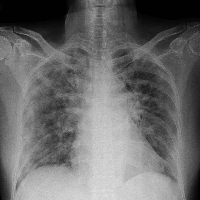

In [30]:
image1=load_img("/content/x-ray-image-2b_full.jpg" ,target_size=(200,200))
image1

In [31]:
image1 =tf.keras.preprocessing.image.img_to_array(image1)
image1.shape
image1 = image1/255
image1 =np.expand_dims(image1, axis =0)
image1.shape


(1, 200, 200, 3)

In [32]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [33]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
image_predict = model.predict(image1)
predicted_img = np.argmax(image_predict, axis=1)
class_labels = ['covid', 'normal', 'pneumonia']
predicted_labels = [class_labels[prediction] for prediction in predicted_img]
print("Predicted labels:", predicted_labels)

1/1 [==============================] - 0s 20ms/step
Predicted labels: ['covid']


In [35]:
import pandas as pd
df =pd.DataFrame({'filename':test_dataset.filenames,'y_true':test_dataset.classes,'y_predict': predicted_classes[:]})
df


,filename,y_true,y_predict
0,Covid/1-s2.0-S1684118220300682-main.pdf-002-a2...,0,0
1,Covid/1-s2.0-S1684118220300682-main.pdf-003-b1...,0,0
2,Covid/1.CXRCTThoraximagesofCOVID-19fromSingapo...,0,0
3,Covid/1.CXRCTThoraximagesofCOVID-19fromSingapo...,0,0
4,Covid/16654_4_1.jpg,0,0
...,...,...,...
213,Pneumonia/Viral Pneumonia (92).png,2,2
214,Pneumonia/Viral Pneumonia (937).png,2,2
215,Pneumonia/Viral Pneumonia (966).png,2,2
216,Pneumonia/Viral Pneumonia (97).png,2,2


In [36]:
misclassification=df[df['y_true']!=df['y_predict']]
misclassification

,filename,y_true,y_predict
54,Covid/COVID-19(193).png,0,2
99,Normal/NORMAL (1339).png,1,2
106,Normal/NORMAL (233).png,1,2
109,Normal/NORMAL (357).png,1,2
121,Normal/NORMAL (646).png,1,0
133,Normal/NORMAL (842).png,1,2
166,Pneumonia/Viral Pneumonia (141).png,2,1
180,Pneumonia/Viral Pneumonia (366).png,2,1
196,Pneumonia/Viral Pneumonia (686).png,2,1


In [37]:
misclassification['y_true'].count()

9